In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.Age.median()

28.0

In [9]:
data.Age = data.Age.fillna(data.Age.median())

In [10]:
data.Age.isnull().sum()

0

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


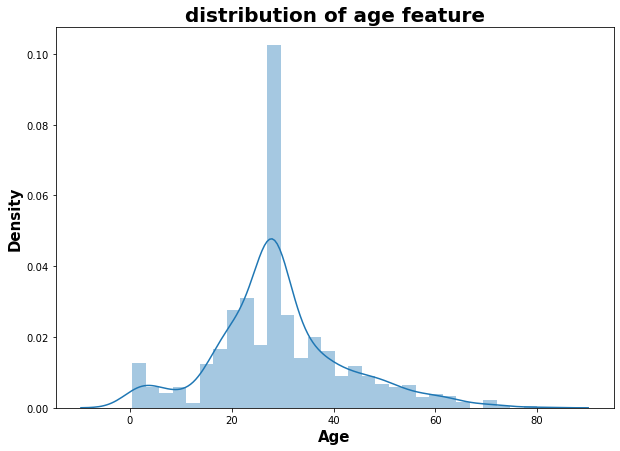

In [16]:
plt.figure(figsize=(10,7))
ax = sns.distplot(data.Age)
ax.set_title('distribution of age feature', fontsize=20, fontweight='bold')
ax.set_xlabel('Age', fontsize=15, fontweight='bold')
ax.set_ylabel('Density', fontsize=15, fontweight='bold')
plt.show()

In [24]:
data.dropna(inplace=True)

In [25]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [26]:
data.Sex.unique()

array(['female', 'male'], dtype=object)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


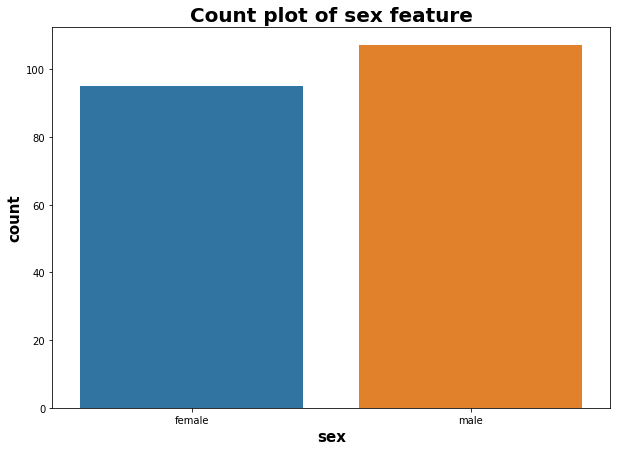

In [34]:
figure = plt.figure(figsize=(10,7))
ax = sns.countplot(data.Sex)
ax.set_title('Count plot of sex feature', fontsize=20, fontweight='bold')
ax.set_xlabel('sex', fontsize=15, fontweight='bold')
ax.set_ylabel('count', fontsize=15, fontweight='bold')
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


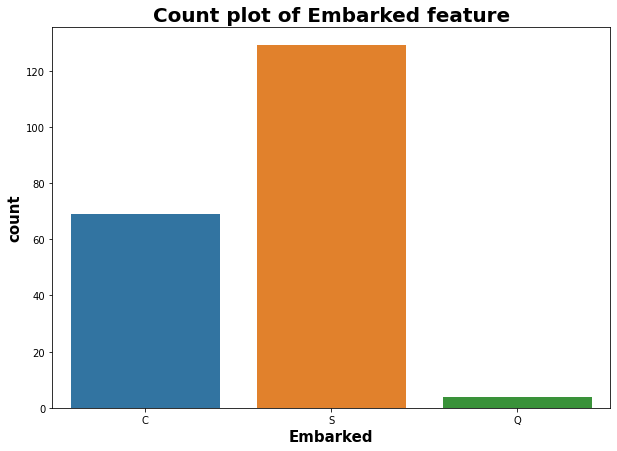

In [38]:
figure = plt.figure(figsize=(10,7))
ax = sns.countplot(data.Embarked)
ax.set_title('Count plot of Embarked feature', fontsize=20, fontweight='bold')
ax.set_xlabel('Embarked', fontsize=15, fontweight='bold')
ax.set_ylabel('count', fontsize=15, fontweight='bold')
plt.show()

In [41]:
p =pd.get_dummies(data.Sex, drop_first=True)

In [42]:
g = pd.get_dummies(data.Embarked, drop_first=True)

In [43]:
pd.concat([data, p, g], axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0,0,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1,0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1


In [45]:
data.drop(['Sex', 'Name', 'Ticket', 'Cabin', 'PassengerId', 'Embarked'], axis=1, inplace=True)

In [46]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542
872,0,1,33.0,0,0,5.0000
879,1,1,56.0,0,1,83.1583
887,1,1,19.0,0,0,30.0000


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


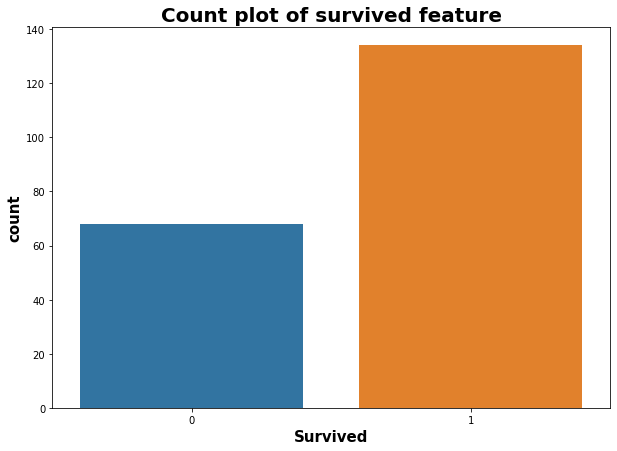

In [49]:
figure = plt.figure(figsize=(10,7))
ax = sns.countplot(data.Survived)
ax.set_title('Count plot of survived feature', fontsize=20, fontweight='bold')
ax.set_xlabel('Survived', fontsize=15, fontweight='bold')
ax.set_ylabel('count', fontsize=15, fontweight='bold')
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


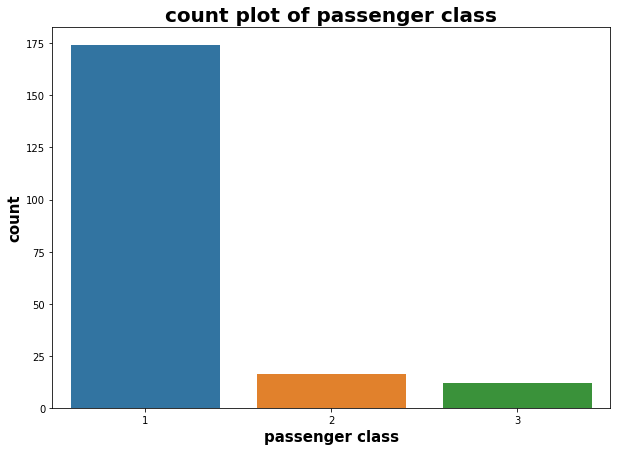

In [54]:
figure = plt.figure(figsize=(10,7))
ax = sns.countplot(data.Pclass)
ax.set_title('count plot of passenger class', fontsize=20, fontweight='bold')
ax.set_xlabel('passenger class', fontsize=15, fontweight='bold')
ax.set_ylabel('count', fontsize=15, fontweight='bold')
plt.show()

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

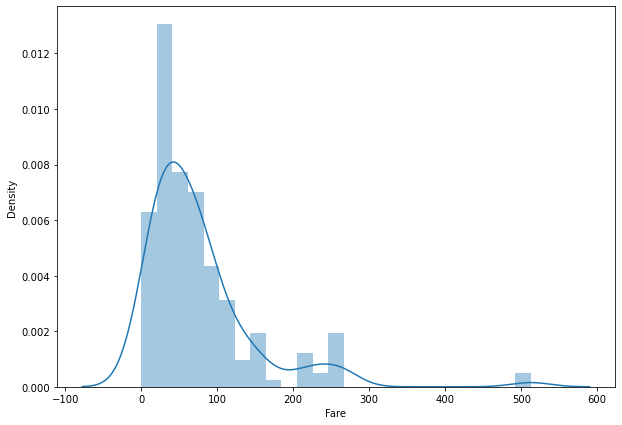

In [56]:
figure = plt.figure(figsize=(10,7))
sns.distplot(data.Fare)

In [57]:
from sklearn.model_selection import train_test_split

In [60]:
x = data.drop('Survived', axis=1)

In [61]:
y = data.Survived

In [62]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.030513,-0.228967,0.138202,0.042456,0.128261
Pclass,-0.030513,1.000000,-0.287238,-0.086972,0.056288,-0.311740
Age,-0.228967,-0.287238,1.000000,-0.136181,-0.240958,-0.072798
SibSp,0.138202,-0.086972,-0.136181,1.000000,0.262348,0.291777
Parch,0.042456,0.056288,-0.240958,0.262348,1.000000,0.384970
Fare,0.128261,-0.311740,-0.072798,0.291777,0.384970,1.000000


<AxesSubplot:>

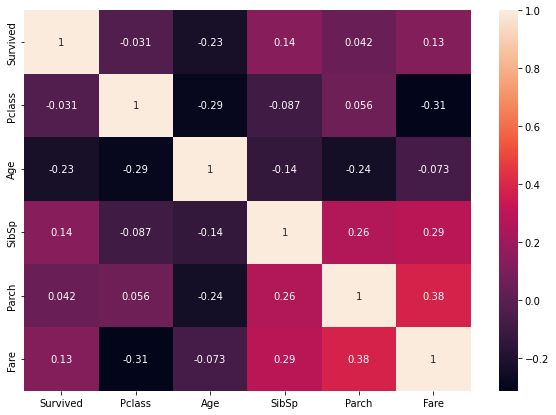

In [64]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [66]:
x_train

,Pclass,Age,SibSp,Parch,Fare
298,1,28.0,0,0,30.5000
679,1,36.0,0,1,512.3292
698,1,49.0,1,1,110.8833
209,1,40.0,0,0,31.0000
96,1,71.0,0,0,34.6542
...,...,...,...,...,...
627,1,21.0,0,0,77.9583
245,1,44.0,2,0,90.0000
751,3,6.0,0,1,12.4750
724,1,27.0,1,0,53.1000


In [67]:
x_test

,Pclass,Age,SibSp,Parch,Fare
779,1,43.00,0,1,211.3375
351,1,28.00,0,0,35.0000
137,1,37.00,1,0,53.1000
484,1,25.00,1,0,91.0792
556,1,48.00,1,0,39.6000
128,3,28.00,1,1,22.3583
587,1,60.00,1,1,79.2000
641,1,24.00,0,0,69.3000
862,1,48.00,0,0,25.9292
748,1,19.00,1,0,53.1000


In [68]:
y_train

298    1
679    1
698    0
209    1
96     0
      ..
627    1
245    0
751    1
724    1
194    1
Name: Survived, Length: 161, dtype: int64

In [69]:
y_test

779    1
351    0
137    0
484    1
556    1
128    1
587    1
641    1
862    1
748    0
329    1
457    1
118    0
311    1
839    1
853    1
504    1
305    1
435    1
763    1
377    0
445    1
776    0
262    0
456    0
889    1
585    1
558    1
453    1
737    1
871    1
291    1
193    1
515    0
273    0
136    1
3      1
430    1
520    1
540    1
462    0
Name: Survived, dtype: int64

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logic = LogisticRegression()

In [72]:
logic.fit(x_train, y_train)

LogisticRegression()

In [73]:
logic.predict(x_train)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_train, logic.predict(x_train))

0.6832298136645962

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dce = DecisionTreeClassifier()

In [78]:
dce.fit(x_train, y_train)

DecisionTreeClassifier()

In [79]:
dce.predict(x_train)

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [80]:
accuracy_score(y_train, dce.predict(x_train))

1.0